<a href="https://colab.research.google.com/github/khotu/DeepLearning/blob/master/cifer10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import cifar10
import numpy as np
from keras.utils import to_categorical, plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import optimizers
from keras import callbacks
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
  # Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
## load the data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
## split into training and validation data

train_data = x_train[:45000]
val_data = x_train[45000:]

train_label = y_train[:45000]
val_label = y_train[45000:]

In [0]:
### Normalising data

mean = np.mean(train_data, axis = (0,1,2,3))
std = np.std(train_data, axis=(0,1,2,3))

train_data = (train_data-mean)/std
val_data = (val_data-mean)/std
x_test = (x_test-mean)/std


In [0]:
## one hot encoding of each class
train_label = to_categorical(train_label)
val_label = to_categorical(val_label)
y_test = to_categorical(y_test)

In [0]:
## Data Augmentation 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40, 
        width_shift_range=0.2,
        height_shift_range=0.2, 
        shear_range = 0.2, 
        zoom_range = 0.2, 
        horizontal_flip= True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
batch_size  = 128
train =  train_datagen.flow(x=train_data, 
                           y=train_label,
                           batch_size=batch_size, )

val = test_datagen.flow(val_data, val_label, batch_size=batch_size)

test = test_datagen.flow(x_test, y_test, batch_size=batch_size)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)       

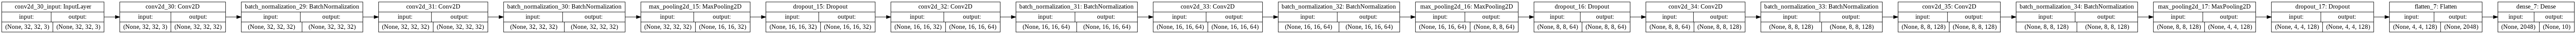

In [37]:
## Baseline model.

model = Sequential()
## Conv1 
model.add(layers.Conv2D(filters=32,
                       kernel_size=3,
                        padding="SAME", 
                        activation='relu',
                        kernel_regularizer = regularizers.l2(1e-4),
                       input_shape = train_data.shape[1:]))
## Add BatchNormalization layer.
model.add(layers.BatchNormalization())
## Conv2
model.add(layers.Conv2D(filters=32,
                       kernel_size=3,
                        padding="SAME", 
                        activation='relu',
                        kernel_regularizer = regularizers.l2(1e-4)))
## Add BatchNormalization layer.
model.add(layers.BatchNormalization())
## Add pool layer.
model.add(layers.MaxPool2D(pool_size=(2, 2)))
## Add DropOut layer.
model.add(layers.Dropout(0.2))


## Conv3
model.add(layers.Conv2D(filters=64,
                       kernel_size=3,
                        padding="SAME", 
                        activation='relu',
                        kernel_regularizer = regularizers.l2(1e-4)))
## Add BatchNormalization layer.
model.add(layers.BatchNormalization())
##Conv4
model.add(layers.Conv2D(filters=64,
                       kernel_size=3,
                        padding="SAME", 
                        activation='relu',
                        kernel_regularizer = regularizers.l2(1e-4)))
## Add BatchNormalization layer.
model.add(layers.BatchNormalization())
## Add pool layer.
model.add(layers.MaxPool2D(pool_size=(2, 2)))
## Add DropOut layer.
model.add(layers.Dropout(0.3))

## Conv5
model.add(layers.Conv2D(filters=128,
                       kernel_size=3,
                        padding="SAME", 
                        activation='relu',
                        kernel_regularizer = regularizers.l2(1e-4)))
## Add BatchNormalization layer.
model.add(layers.BatchNormalization())
##Conv6
model.add(layers.Conv2D(filters=128,
                       kernel_size=3,
                        padding="SAME", 
                        activation='relu',
                        kernel_regularizer = regularizers.l2(1e-4)))
## Add BatchNormalization layer.
model.add(layers.BatchNormalization())
## Add pool layer.
model.add(layers.MaxPool2D(pool_size=(2, 2)))
## Add DropOut layer.
model.add(layers.Dropout(0.4))


## Fully connected layer.
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation='softmax', ))

## print model summary.
model.summary()
plot_model(model,show_shapes=True,rankdir='LR' )

In [0]:
## Save model's parameters 
checkpoint = callbacks.ModelCheckpoint(filepath= "/content/drive/My Drive/model.cifer10.hdf5", 
                                      monitor='val_loss', 
                                      save_best_only=True, 
                                      period=1)

## Define optimizer
optimizer = optimizers.adam(learning_rate=0.0001, decay = 1e-5,)

## Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])

## Fit the model
history =  model.fit_generator(generator=train, 
                    steps_per_epoch= train_data.shape[0]//batch_size, 
                    epochs=100,
                    callbacks=[checkpoint],
                    validation_data=val,)

In [0]:
Accuracy = history['acc']
Val_accuracy = history['val_acc']

plt.plot(range(len(Accuracy)), Accuracy, label= "Training Accuracy")
plt.plot(range(len(Accuracy)), Val_accuracy, label= "Validation Accuracy")
plt.title("Accuracies Graph")
plt.legend()
plt.show()

In [0]:
Loss = history['loss']
Val_loss = history['val_loss']

plt.plot(range(len(Loss)), Loss, label= "Training Loss")
plt.plot(range(len(Loss)), Val_loss, label= "Validation Loss")
plt.title("Loss Graph")
plt.legend()
plt.show()